## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\195313\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\195313\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\195313\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\195313\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    """Code Here
    建立你的神經網路
    """

    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 64us/step - loss: 2.2704 - accuracy: 0.1474 - val_loss: 2.2252 - val_accuracy: 0.1806
Epoch 2/500
50000/50000 [==============================] - 3s 62us/step - loss: 2.1922 - accuracy: 0.2094 - val_loss: 2.1668 - val_accuracy: 0.2219
Epoch 3/500
50000/50000 [==============================] - 3s 61us/step - loss: 2.1392 - accuracy: 0.2396 - val_loss: 2.1198 - val_accuracy: 0.2472
Epoch 4/500
50000/50000 [==============================] - 3s 61us/step - loss: 2.0952 - accuracy: 0.2599 - val_loss: 2.0791 - val_accuracy: 0.2607
Epoch 5/500
50000/50000 [==============================] - 3s 60us/step - loss: 2.0568 - accuracy: 0.2716 - val_loss: 2.0443 - val_accuracy: 0.2760
Epoch 6/500
50000/50000 [==============================] - 3s 60us/step - loss: 2.0246 - accuracy: 0.2856 - val_loss: 2.0145 - val_accuracy: 0.2852
Epoch 7/500
50000/50000 [==============================] - 3s

50000/50000 [==============================] - 3s 62us/step - loss: 1.6756 - accuracy: 0.4148 - val_loss: 1.6826 - val_accuracy: 0.4122
Epoch 55/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.6722 - accuracy: 0.4162 - val_loss: 1.6812 - val_accuracy: 0.4116
Epoch 56/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.6690 - accuracy: 0.4177 - val_loss: 1.6806 - val_accuracy: 0.4144
Epoch 57/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.6661 - accuracy: 0.4184 - val_loss: 1.6723 - val_accuracy: 0.4164
Epoch 58/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.6631 - accuracy: 0.4188 - val_loss: 1.6711 - val_accuracy: 0.4197
Epoch 59/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.6600 - accuracy: 0.4211 - val_loss: 1.6680 - val_accuracy: 0.4180
Epoch 60/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.6570 - accuracy: 0.4213 - val_loss: 

50000/50000 [==============================] - 3s 62us/step - loss: 1.5392 - accuracy: 0.4624 - val_loss: 1.5610 - val_accuracy: 0.4548
Epoch 110/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.5373 - accuracy: 0.4640 - val_loss: 1.5653 - val_accuracy: 0.4515
Epoch 111/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.5356 - accuracy: 0.4650 - val_loss: 1.5594 - val_accuracy: 0.4546
Epoch 112/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.5335 - accuracy: 0.4652 - val_loss: 1.5596 - val_accuracy: 0.4526
Epoch 113/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.5316 - accuracy: 0.4658 - val_loss: 1.5561 - val_accuracy: 0.4555
Epoch 114/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.5298 - accuracy: 0.4659 - val_loss: 1.5545 - val_accuracy: 0.4568
Epoch 115/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.5279 - accuracy: 0.4677 - val_

Epoch 164/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.4471 - accuracy: 0.4949 - val_loss: 1.4959 - val_accuracy: 0.4721
Epoch 165/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.4461 - accuracy: 0.4953 - val_loss: 1.4919 - val_accuracy: 0.4772
Epoch 166/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.4445 - accuracy: 0.4962 - val_loss: 1.4926 - val_accuracy: 0.4729
Epoch 167/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.4429 - accuracy: 0.4963 - val_loss: 1.4941 - val_accuracy: 0.4745
Epoch 168/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.4417 - accuracy: 0.4962 - val_loss: 1.4900 - val_accuracy: 0.4753
Epoch 169/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.4401 - accuracy: 0.4982 - val_loss: 1.4868 - val_accuracy: 0.4785
Epoch 170/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.4388 - accuracy:

50000/50000 [==============================] - 3s 62us/step - loss: 1.3729 - accuracy: 0.5216 - val_loss: 1.4516 - val_accuracy: 0.4920
Epoch 219/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.3712 - accuracy: 0.5213 - val_loss: 1.4473 - val_accuracy: 0.4853
Epoch 220/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.3694 - accuracy: 0.5216 - val_loss: 1.4454 - val_accuracy: 0.4870
Epoch 221/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.3692 - accuracy: 0.5218 - val_loss: 1.4396 - val_accuracy: 0.4912
Epoch 222/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.3674 - accuracy: 0.5229 - val_loss: 1.4414 - val_accuracy: 0.4917
Epoch 223/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.3663 - accuracy: 0.5232 - val_loss: 1.4433 - val_accuracy: 0.4883
Epoch 224/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.3647 - accuracy: 0.5242 - val_

50000/50000 [==============================] - 3s 62us/step - loss: 1.3064 - accuracy: 0.5436 - val_loss: 1.4088 - val_accuracy: 0.5052
Epoch 273/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.3056 - accuracy: 0.5429 - val_loss: 1.4093 - val_accuracy: 0.5007
Epoch 274/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.3040 - accuracy: 0.5436 - val_loss: 1.4108 - val_accuracy: 0.4974
Epoch 275/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.3025 - accuracy: 0.5450 - val_loss: 1.4031 - val_accuracy: 0.5003
Epoch 276/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.3017 - accuracy: 0.5454 - val_loss: 1.4097 - val_accuracy: 0.4993
Epoch 277/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.3007 - accuracy: 0.5458 - val_loss: 1.4092 - val_accuracy: 0.5004
Epoch 278/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.2993 - accuracy: 0.5446 - val_

Epoch 327/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.2458 - accuracy: 0.5655 - val_loss: 1.3858 - val_accuracy: 0.5107
Epoch 328/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.2446 - accuracy: 0.5659 - val_loss: 1.4018 - val_accuracy: 0.5032
Epoch 329/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.2434 - accuracy: 0.5650 - val_loss: 1.3745 - val_accuracy: 0.5121
Epoch 330/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.2419 - accuracy: 0.5665 - val_loss: 1.3849 - val_accuracy: 0.5102
Epoch 331/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.2405 - accuracy: 0.5664 - val_loss: 1.3726 - val_accuracy: 0.5129
Epoch 332/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.2394 - accuracy: 0.5682 - val_loss: 1.3749 - val_accuracy: 0.5118
Epoch 333/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.2392 - accuracy:

50000/50000 [==============================] - 3s 62us/step - loss: 1.1893 - accuracy: 0.5846 - val_loss: 1.3581 - val_accuracy: 0.5195
Epoch 382/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.1868 - accuracy: 0.5849 - val_loss: 1.3695 - val_accuracy: 0.5124
Epoch 383/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.1873 - accuracy: 0.5861 - val_loss: 1.4262 - val_accuracy: 0.4892
Epoch 384/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.1862 - accuracy: 0.5856 - val_loss: 1.3590 - val_accuracy: 0.5194
Epoch 385/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.1842 - accuracy: 0.5861 - val_loss: 1.3611 - val_accuracy: 0.5152
Epoch 386/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.1839 - accuracy: 0.5868 - val_loss: 1.3845 - val_accuracy: 0.5101
Epoch 387/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.1828 - accuracy: 0.5883 - val_

Epoch 436/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.1348 - accuracy: 0.6050 - val_loss: 1.4106 - val_accuracy: 0.5110
Epoch 437/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.1344 - accuracy: 0.6037 - val_loss: 1.3402 - val_accuracy: 0.5241
Epoch 438/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.1329 - accuracy: 0.6035 - val_loss: 1.3587 - val_accuracy: 0.5180
Epoch 439/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.1327 - accuracy: 0.6063 - val_loss: 1.3817 - val_accuracy: 0.5129
Epoch 440/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.1312 - accuracy: 0.6032 - val_loss: 1.3816 - val_accuracy: 0.5126
Epoch 441/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.1313 - accuracy: 0.6059 - val_loss: 1.3419 - val_accuracy: 0.5245
Epoch 442/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.1282 - accuracy:

50000/50000 [==============================] - 3s 64us/step - loss: 1.0845 - accuracy: 0.6207 - val_loss: 1.3518 - val_accuracy: 0.5235
Epoch 491/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.0825 - accuracy: 0.6224 - val_loss: 1.3542 - val_accuracy: 0.5203
Epoch 492/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.0815 - accuracy: 0.6231 - val_loss: 1.3903 - val_accuracy: 0.5128
Epoch 493/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.0827 - accuracy: 0.6207 - val_loss: 1.3357 - val_accuracy: 0.5301
Epoch 494/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.0785 - accuracy: 0.6240 - val_loss: 1.3332 - val_accuracy: 0.5305
Epoch 495/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.0789 - accuracy: 0.6229 - val_loss: 1.3639 - val_accuracy: 0.5228
Epoch 496/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.0774 - accuracy: 0.6249 - val_

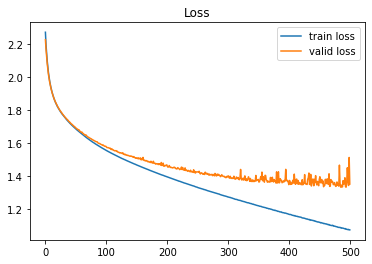

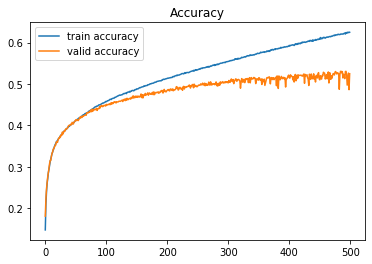

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()